<a href="https://colab.research.google.com/github/didacuscha/Maths_for_AI/blob/main/Laboratorio_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

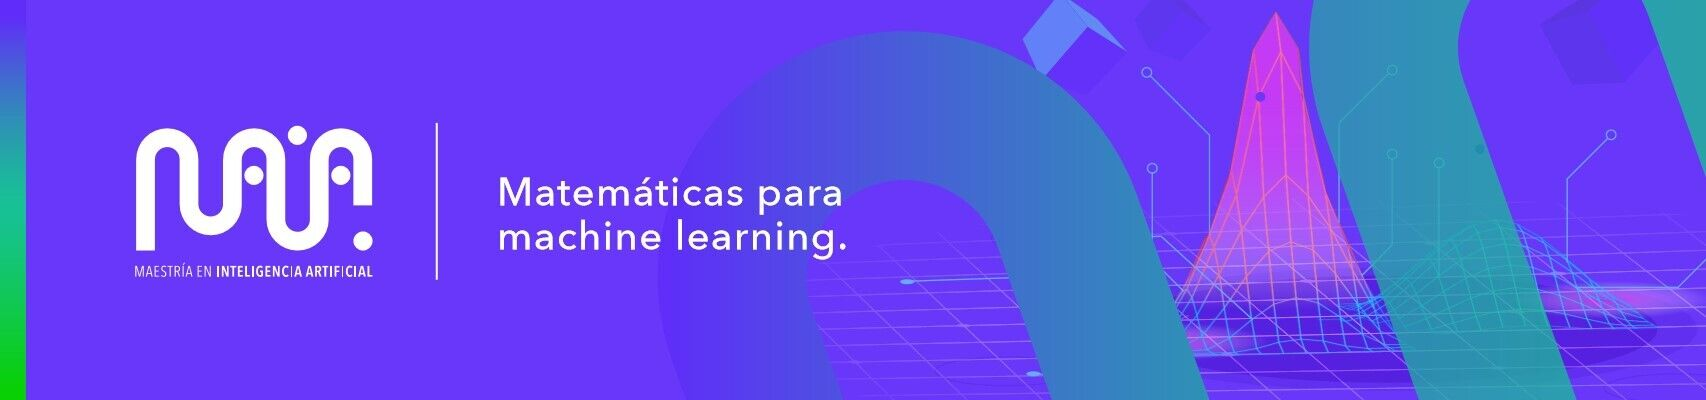

##**Laboratorio: Inspección visual del gradiente**

Recordemos que el gradiente evaluado en un punto es un vector $n\times1$ que contiene las derivadas parciales respecto a cada variable de una función $f:\mathbb{R}^n → \mathbb{R}$ que recibe como entrada un vector $x ∈ \mathbb{R}^n$. El vector de gradiente nos provee información sobre: la dirección de incremento de la función en el punto $x$, y la magnitud de este incremento.

En esta práctica presentaremos formas de graficar el gradiente de una función $f:\mathbb{R}^2 → \mathbb{R}$ junto con sus curvas de nivel para obtener información visual de la información que nos está dando el gradiente sobre la función.

In [1]:
#Importamos las librerias necesarias para el desarrollo de la práctica.

import numpy as np
import matplotlib.pyplot as plt

##**1. Función de prueba**

La función con la que trabajaremos durante la práctica es la siguiente:

$$f(x) = x_1^2 + x_2^2,$$ donde $x=[x_1,x_2]^T$.

Recordemos que el gradiente es un vector cuyos elementos contiene las derivadas parciales de la función respecto a cada variable. En este caso el gradiente de la función es el siguiente:

$$ \begin{align}\nabla f(x) &= \left[\frac{\partial f}{\partial x_1}(x),\frac{\partial f}{\partial x_2}(x)  \right]^T\\
\nabla f(x) &= \left[2 x_1,2x_2 \right]^T
\end{align}
$$


En primer lugar, definimos una función de python que calcule el gradiente para un punto $[x_1,x_2]^T$ y lo retorne como un vector de numpy.


In [3]:
def gradiente(x1,x2):
  return np.array([2*x1, 2*x2])

A continuación, graficamos la superficie de la función dada, sus curvas de nivel y las flechas que indiquen en que dirección y con que magnitud se orienta el vector gradiente en cada punto. Para esto, vamos a utilizar la función gradiente que definimos y el método *quiver* de matplotlib que nos permite graficar los vectores y recibe los siguientes parámetros (en orden):

- **X**: Los valores de las coordenadas $x_1$ para los que se graficarán los vectores.

- **Y**: Los valores de las coordenadas $x_2$ para los que se graficarán los vectores.

- **u**: Dirección en la que se mueven los vectores en el eje horizontal, que en nuestro caso va a ser el primer componente del vector gradiente, es decir, $\frac{\partial f}{\partial x_1}(x)$.

- **v**: Dirección en la que se mueven los vectores en el eje vertical, que en nuestro caso va a ser el segundo componente del vector gradiente, es decir, $\frac{\partial f}{\partial x_2}(x)$.

In [4]:
#Definimos los valores de x1 y x2 para los que vamos a graficar tanto la superficie como las curvas de nivel y vectores
x1 = np.linspace(-3,3)
x2 = np.linspace(-3,3)

#Realizamos el meshgrid para poder graficar las curvas de nivel.
X1,X2 = np.meshgrid(x1,x2)

#Calculamos la función f sobre X1 y X2.
f = X1**2 + X2**2

#Extraemos los valores del gradiente para poder graficar los vectores.

dx,dy = gradiente(X1,X2)


A continuación generamos las gráficas:

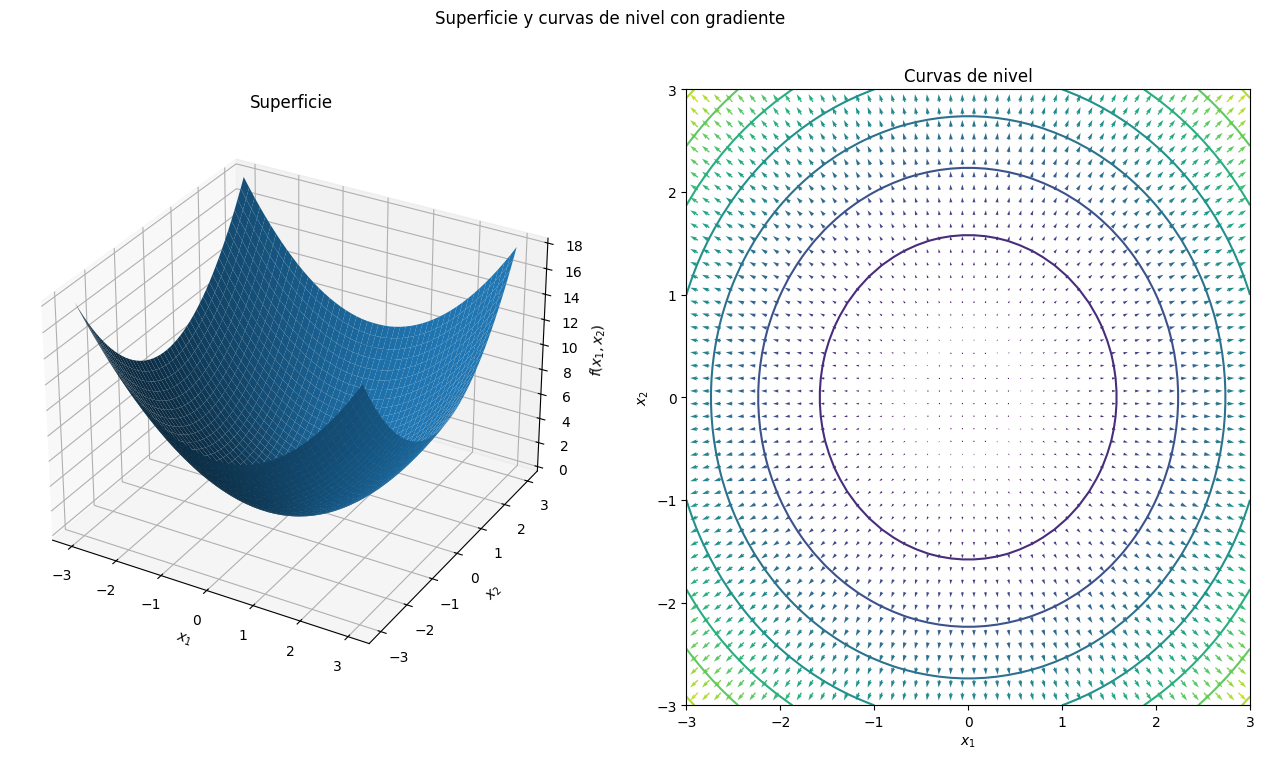

In [5]:
#Creamos la figura con 2 espacios, uno con proyección 3d y el otro con proyección 2d.

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121,projection="3d")
ax2 = fig.add_subplot(122)

#Graficamos la superficie, las curvas de nivel y los vectores.
ax.plot_surface(X1,X2,f)
ax2.contour(X1,X2,f)

#Graficamos los vectores. En este caso indicamos como quinto argumento la función f para colorear las flechas según el valor de la función en cada punto.
ax2.quiver(X1,X2,dx,dy, f)


ax.set(xlabel="$x_1$",ylabel="$x_2$",zlabel="$f(x_1,x_2)$",title="Superficie")
ax2.set(xlabel="$x_1$",ylabel="$x_2$",title="Curvas de nivel")

fig.suptitle("Superficie y curvas de nivel con gradiente")

plt.show()

De acuerdo con las gráficas anteriores, se evidencia que la función es un paraboloide hacia arriba centrado en el origen. Por lo tanto, considerando que el gradiente señala la dirección de mayor crecimiento en un punto dado, las flechas deberían apuntar en sentido opuesto a las coordenadas del origen y ampliarse progresivamente a medida que se alejan de este punto. Esto se debe a que la función experimenta un crecimiento cuadrático a medida que se aleja del origen del paraboloide.

#**Ejercicio**

Considere la siguiente función: $f(x) = (x_1 - 3)^2 + (x_2 - 4)^2$, donde $x=[x_1, x_2]^T$.



**1.** Modifique la siguiente función de Python para que retorne el gradiente de la función dada evaluado en un punto.

In [9]:
def gradiente_funcion(x1,x2):

  #Reemplace la línea a continuación con el gradiente de la función dada.
  return np.array([2*(x1-3), 2*(x2-4)])

**2.** Modifique el siguiente código para que grafique la superficie, las curvas de nivel y los vectores del gradiente de la función anterior. **Ayuda:** Modifique la función f en el código fuente.

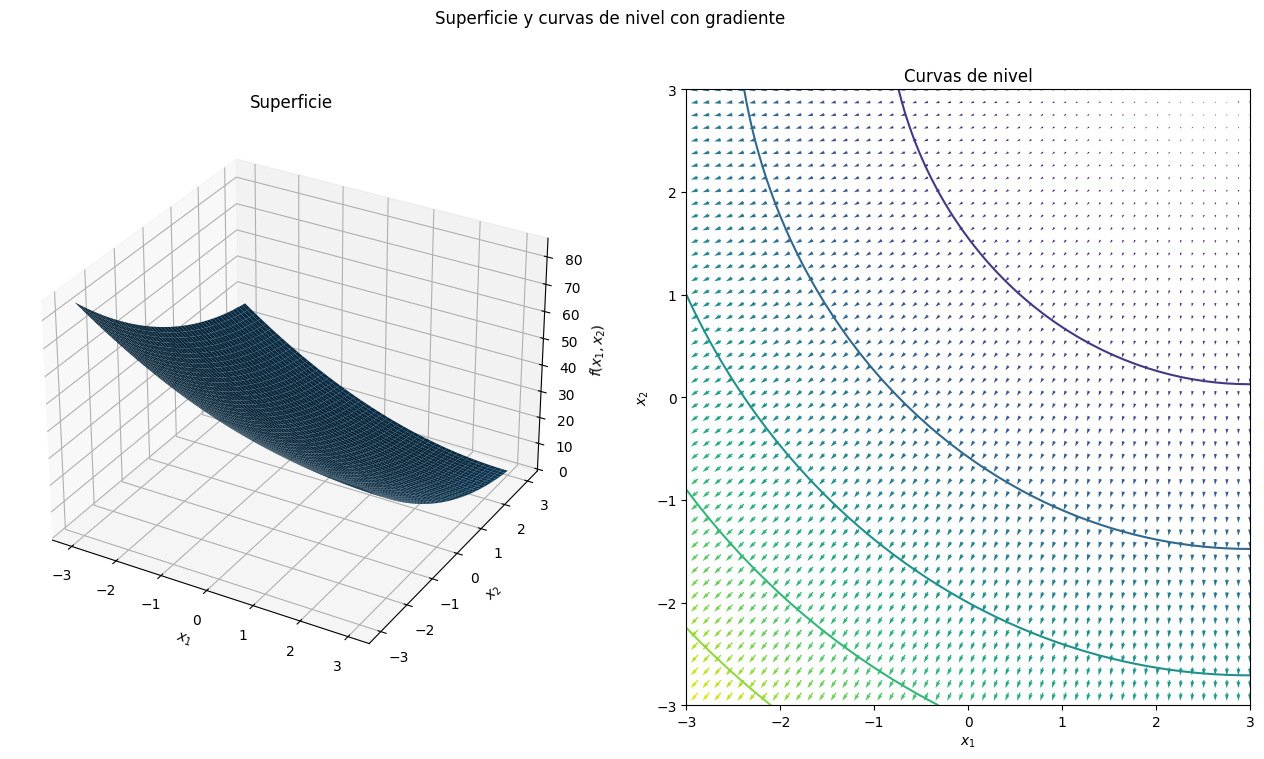

In [10]:
x1 = np.linspace(-3,3)
x2 = np.linspace(-3,3)

X1,X2 = np.meshgrid(x1,x2)

#Reemplace la línea a continuación con la ecuación de la función dada.
f = (X1-3)**2 + (X2-4)**2

dx,dy = gradiente_funcion(X1,X2)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121,projection="3d")
ax2 = fig.add_subplot(122)

ax.plot_surface(X1,X2,f)
ax2.contour(X1,X2,f)
ax2.quiver(X1,X2,dx,dy, f)

ax.set(xlabel="$x_1$",ylabel="$x_2$",zlabel="$f(x_1,x_2)$",title="Superficie")
ax2.set(xlabel="$x_1$",ylabel="$x_2$",title="Curvas de nivel")

fig.suptitle("Superficie y curvas de nivel con gradiente")

plt.show()

**3.** Analice los resultados obtenidos. ¿Qué forma tiene la función? ¿En qué dirección apuntan las flechas del gradiente?